In [51]:
import numpy as np  # Importing NumPy library
import pandas as pd  # Importing Pandas library
import matplotlib.pyplot as plt  # Importing Matplotlib library's "pyplot" module
import seaborn as sns  # Importing Seaborn library


import os

In [52]:
data = pd.read_csv("Classification.csv")
data['fetal_health'] = data['fetal_health'].replace(1.0,0)
data['fetal_health'] = data['fetal_health'].replace(2.0,0)
data['fetal_health'] = data['fetal_health'].replace(3.0,1)
data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120,0.000,0.000,0.000,0.000,0.0,0.0,73,0.5,43,...,62,126,2,0,120,137,121,73,1,0
1,132,0.006,0.000,0.006,0.003,0.0,0.0,17,2.1,0,...,68,198,6,1,141,136,140,12,0,0
2,133,0.003,0.000,0.008,0.003,0.0,0.0,16,2.1,0,...,68,198,5,1,141,135,138,13,0,0
3,134,0.003,0.000,0.008,0.003,0.0,0.0,16,2.4,0,...,53,170,11,0,137,134,137,13,1,0
4,132,0.007,0.000,0.008,0.000,0.0,0.0,16,2.4,0,...,53,170,9,0,137,136,138,11,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140,0.000,0.000,0.007,0.000,0.0,0.0,79,0.2,25,...,137,177,4,0,153,150,152,2,0,0
2122,140,0.001,0.000,0.007,0.000,0.0,0.0,78,0.4,22,...,103,169,6,0,152,148,151,3,1,0
2123,140,0.001,0.000,0.007,0.000,0.0,0.0,79,0.4,20,...,103,170,5,0,153,148,152,4,1,0
2124,140,0.001,0.000,0.006,0.000,0.0,0.0,78,0.4,27,...,103,169,6,0,152,147,151,4,1,0


In [53]:
X = data.drop(["fetal_health"], axis=1) 
y = data['fetal_health']

In [54]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=142)

MLP = MLPClassifier(random_state=1, max_iter=300)

MLP.fit(X_train, y_train)
y_pred=MLP.predict(X_test)

In [55]:
#Training Score
MLP.score(X_train, y_train)*100

96.42409033877038

In [56]:
#Testing Score
MLP.score(X_test, y_test)*100

95.30075187969925

In [57]:
from sklearn.metrics import classification_report
#evaluate model performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       488
           1       0.66      0.91      0.76        44

    accuracy                           0.95       532
   macro avg       0.82      0.93      0.87       532
weighted avg       0.96      0.95      0.96       532



<AxesSubplot:>

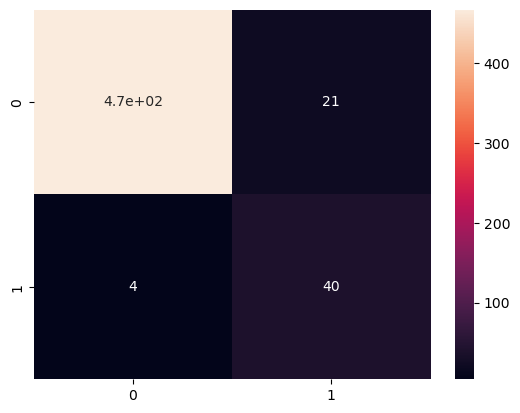

In [58]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)

accuracy_score(y_test, y_pred)

sns.heatmap(cm, annot=True)


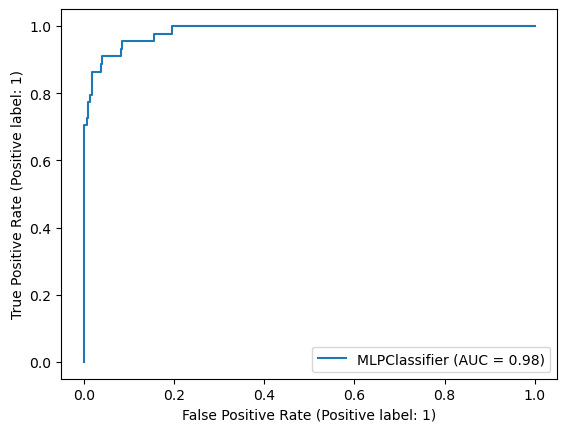

In [59]:
from sklearn.metrics import RocCurveDisplay
metrics.RocCurveDisplay.from_estimator(MLP, X_test, y_test)
plt.show()